In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/superbijk/midterm-miniproject/main/HCV-Egy-Data.csv'
df = pd.read_csv(url)
df

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


In [6]:
categorical = ['Gender', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ']
numerical = ['Age ', 'BMI', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading']

In [7]:
#split target and predictor
y = df.iloc[:,-1].map({1:'1', 2:'2', 3:'3', 4:'4'})
X  = df.iloc[:,:-1]
y

0       2
1       2
2       4
3       3
4       1
       ..
1380    4
1381    2
1382    2
1383    3
1384    3
Name: Baselinehistological staging, Length: 1385, dtype: object

In [8]:
# Onehot
dum_df = pd.get_dummies(X, columns=categorical, drop_first=True)
dum_df

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,...,RNA EF,Baseline histological Grading,Gender_2,Fever_2,Nausea/Vomting_2,Headache _2,Diarrhea _2,Fatigue & generalized bone ache _2,Jaundice _2,Epigastric pain _2
0,56,35,7425,4248807,14,112132,99,84,52,109,...,5,13,0,1,0,0,0,1,1,1
1,46,29,12101,4429425,10,129367,91,123,95,75,...,31085,4,0,0,1,1,0,1,1,0
2,57,33,4178,4621191,12,151522,113,49,95,107,...,558829,4,0,1,1,1,1,0,0,0
3,49,33,6490,4794631,10,146457,43,64,109,80,...,582301,10,1,0,1,0,1,0,1,0
4,59,32,3661,4606375,11,187684,99,104,67,48,...,242861,11,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,29,7044,4957174,15,202520,122,59,78,106,...,5,15,0,0,1,1,1,0,0,0
1381,55,34,6207,4636951,10,115776,128,102,65,99,...,236273,10,0,0,1,1,0,0,0,0
1382,42,26,4913,4122038,14,128354,61,93,123,61,...,160457,6,0,1,1,0,0,0,1,0
1383,52,29,7257,4241990,10,205908,70,97,104,74,...,696074,15,0,1,0,0,1,1,1,0


In [9]:
# test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dum_df, y, test_size=0.3, random_state=42)

In [10]:
print('X_train shape', X_train.shape); print('X_test shape', X_test.shape); print('y_train shape', y_train.shape); print('y_test shape', y_test.shape)

X_train shape (969, 28)
X_test shape (416, 28)
y_train shape (969,)
y_test shape (416,)


In [11]:
# scaling train and test set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.loc[:, numerical])
X_train.loc[:, numerical] = scaler.transform(X_train.loc[:, numerical])
X_test.loc[:, numerical] = scaler.transform(X_test.loc[:, numerical])

/Users/fame/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/fame/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
X_train

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,...,RNA EF,Baseline histological Grading,Gender_2,Fever_2,Nausea/Vomting_2,Headache _2,Diarrhea _2,Fatigue & generalized bone ache _2,Jaundice _2,Epigastric pain _2
772,-0.396665,-0.377029,-0.894260,-0.643724,-0.914104,-1.126196,1.528497,0.075644,1.680174,-1.180579,...,0.284216,-0.940797,1,1,1,0,0,1,0,0
266,-0.511230,-0.377029,1.131638,-1.268318,-0.914104,0.656375,0.493236,-0.623553,-0.856379,1.221380,...,-0.790113,0.061547,1,0,1,1,1,1,1,0
327,1.321821,0.609712,0.039846,0.972407,1.419933,1.645320,1.145067,-0.312799,-1.613559,0.840117,...,-0.777382,-1.692556,1,1,1,1,0,0,1,1
348,0.290730,1.103082,1.231506,-0.549407,0.836423,-1.377320,-1.193857,-0.002044,0.052237,1.183254,...,1.886278,1.314479,0,0,0,0,0,0,0,1
423,0.863558,-0.130343,-1.353803,1.109614,0.836423,1.335193,-0.120252,1.435195,0.241532,-1.333084,...,-0.680275,0.061547,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1.665518,-1.610454,-0.624315,0.096691,-0.330595,-0.652418,0.569922,-0.584709,-0.477789,-1.333084,...,-0.440468,0.562720,1,1,0,0,0,1,0,0
1130,-0.511230,0.856397,1.516468,1.446673,-0.914104,-0.202959,1.758555,1.551728,-0.477789,-0.341799,...,1.709784,-0.439625,1,1,0,0,1,1,1,0
1294,-0.511230,-0.130343,0.602637,-1.330290,-1.497614,-0.373676,0.339864,-1.283906,0.430827,-0.379926,...,-1.090612,-0.189039,0,1,1,1,0,0,1,1
860,0.634427,-0.130343,0.295148,0.961420,-0.330595,1.760670,0.148149,-1.478128,0.468686,-0.036789,...,-1.090612,1.063892,1,1,1,1,0,1,0,1


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [14]:
score = []

In [15]:
# ลอง predict 
'''from sklearn.model_selection import cross_val_predict
gnb = GaussianNB()
y_pred = cross_val_predict(gnb, X_train,y_train, cv=3)
'''

'from sklearn.model_selection import cross_val_predict\ngnb = GaussianNB()\ny_pred = cross_val_predict(gnb, X_train,y_train, cv=3)\n'

In [16]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
score.append(cv.mean().round(3))

[0.22164948 0.23195876 0.24742268 0.21134021 0.24870466]
0.23221515944661072


In [17]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
score.append(cv.mean().round(3))

[0.24742268 0.23195876 0.2371134  0.2371134  0.26943005]
0.24460765984723037


In [18]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
score.append(cv.mean().round(3))

[0.21134021 0.22164948 0.24742268 0.2371134  0.24870466]
0.23324608728166232


In [19]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
score.append(cv.mean().round(3))

[0.24742268 0.22164948 0.23195876 0.2371134  0.19689119]
0.22700710432135035


In [20]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
score.append(cv.mean().round(3))

[0.25773196 0.24742268 0.24742268 0.20618557 0.19689119]
0.23113081566155652


In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
score.append(cv.mean().round(3))

[0.28350515 0.18556701 0.22680412 0.20103093 0.19170984]
0.21772341221088615


In [22]:
name =[ 'Naive Bayes','Decision Tree','KNN','Random Forest','Support Vector Classifier','Xtreme Gradient Boosting']
report = pd.DataFrame({'Model':name, 'Base line': score})
report

,Model,Base line
0,Naive Bayes,0.232
1,Decision Tree,0.245
2,KNN,0.233
3,Random Forest,0.227
4,Support Vector Classifier,0.231
5,Xtreme Gradient Boosting,0.218


In [23]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

#create report
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [32]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 3 folds for each of 55 candidates, totalling 165 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:  6.5min finished


SVC
Best Score: 0.2724458204334365
Best Parameters: {'C': 1, 'degree': 5, 'kernel': 'poly'}


In [33]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.9s


KNN
Best Score: 0.27347781217750256
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    2.0s finished


In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

parameters = {
                      'learning_rate' : ['constant', 'adaptive'],
                      'max_iter': [50,100,150,200],
                      'hidden_layer_sizes':[5,10,15],
                      'activation' : ['tanh','relu']}
        
clf_MLP = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1,cv=3)
        
best_clf_MLP = clf_MLP.fit(X_train,y_train)
clf_performance(best_clf_MLP,'MLP')

MLP
Best Score: 0.2652218782249742
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'max_iter': 100}


/Users/fame/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
y_hat_xgb = best_clf_svc.best_estimator_.predict(X_test)
y_hat_knn = best_clf_knn.best_estimator_.predict(X_test)
y_hat_MLP = best_clf_MLP.best_estimator_.predict(X_test)

Confusion matrix, without normalization
[[10 15 39 41]
 [ 6 10 47 39]
 [ 6  8 49 36]
 [11  8 48 43]]
Normalized confusion matrix
[[0.0952381  0.14285714 0.37142857 0.39047619]
 [0.05882353 0.09803922 0.46078431 0.38235294]
 [0.06060606 0.08080808 0.49494949 0.36363636]
 [0.1        0.07272727 0.43636364 0.39090909]]


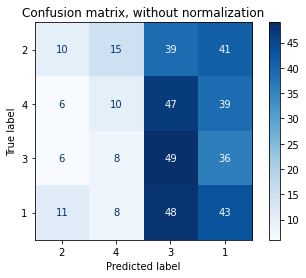

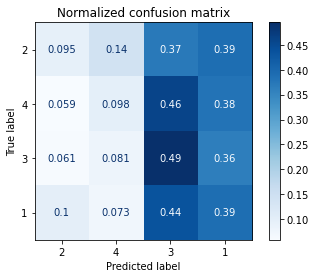

In [49]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
class_names = y.unique()
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_clf_svc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[26 26 23 30]
 [21 19 27 35]
 [24 14 35 26]
 [27 28 25 30]]
Normalized confusion matrix
[[0.24761905 0.24761905 0.21904762 0.28571429]
 [0.20588235 0.18627451 0.26470588 0.34313725]
 [0.24242424 0.14141414 0.35353535 0.26262626]
 [0.24545455 0.25454545 0.22727273 0.27272727]]


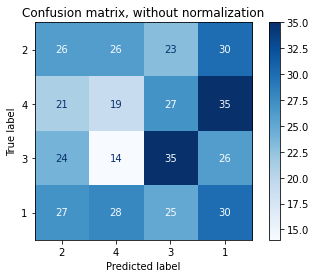

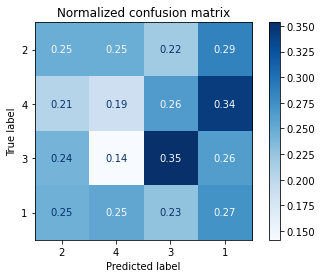

In [50]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
class_names = y.unique()
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_clf_knn, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[41 16 22 26]
 [35 17 29 21]
 [39 14 23 23]
 [48 12 28 22]]
Normalized confusion matrix
[[0.39047619 0.15238095 0.20952381 0.24761905]
 [0.34313725 0.16666667 0.28431373 0.20588235]
 [0.39393939 0.14141414 0.23232323 0.23232323]
 [0.43636364 0.10909091 0.25454545 0.2       ]]


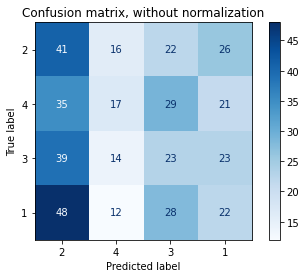

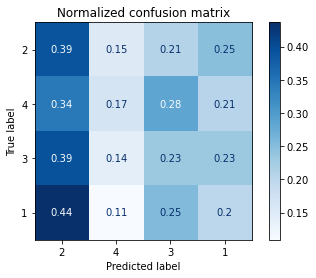

In [51]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
class_names = y.unique()
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_clf_MLP, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
classification_report